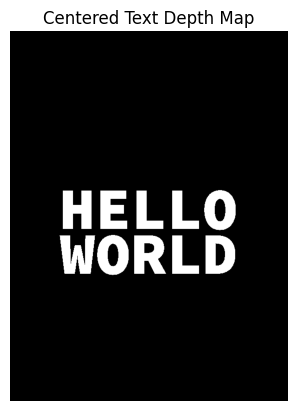

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def create_text_depthmap(text="HELLO WORLD", shape=(600, 800), font_path='font.ttf', font_size=128):
    # Load font
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        font = ImageFont.load_default()

    # Create image large enough to contain the text
    temp_image = Image.new('RGB', (2048, 2048))
    draw = ImageDraw.Draw(temp_image)

    # Split text into words and process for line wrapping
    words = text.split()
    lines = []
    line = []
    line_width = 0
    space_width = draw.textbbox((0, 0), ' ', font=font)[2] - draw.textbbox((0, 0), '', font=font)[2]

    for word in words:
        word_width = draw.textbbox((0, 0), word, font=font)[2] - draw.textbbox((0, 0), '', font=font)[2]
        if line_width + word_width + space_width <= shape[0]:
            line.append(word)
            line_width += word_width + space_width
        else:
            lines.append(' '.join(line))
            line = [word]
            line_width = word_width + space_width
    if line:
        lines.append(' '.join(line))

    # Calculate total text height for vertical centering
    text_height = 0
    line_heights = []
    for line in lines:
        line_bbox = draw.textbbox((0, 0), line, font=font)
        line_height = line_bbox[3] - line_bbox[1]
        text_height += line_height + 10  # Added 10 for padding between lines
        line_heights.append(line_height)

    start_y = (shape[1] - text_height) // 2 if shape[1] > text_height else 0

    # Create final image
    image = Image.new('1', (shape[0], shape[1]), 0)
    draw = ImageDraw.Draw(image)

    y = start_y
    for i, line in enumerate(lines):
        words = line.split()
        x = (shape[0] - sum(draw.textbbox((0, 0), w, font=font)[2] - draw.textbbox((0, 0), '', font=font)[2] + space_width for w in words[:-1]) - (draw.textbbox((0, 0), words[-1], font=font)[2] - draw.textbbox((0, 0), '', font=font)[2])) // 2
        for word in words:
            for char in word:
                char_width = draw.textbbox((0, 0), char, font=font)[2] - draw.textbbox((0, 0), '', font=font)[2]
                draw.text((x, y), char, 1, font=font)
                x += char_width
            x += space_width  # add space after each word except the last
        y += line_heights[i] + 10  # Updated to include padding

    # Convert to numpy array and create depth map
    array = np.array(image)
    return array.astype(int)

# Example usage
text = "HELLO WORLD THIS IS A TEST OF WORD WRAPPING AND CHARACTER DRAWING"
depth_map_corrected = create_text_depthmap("HELLO WORLD")
plt.imshow(depth_map_corrected, cmap='gray')
plt.title("Centered Text Depth Map")
plt.axis('off')
plt.show()


In [13]:
depth_map_corrected

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

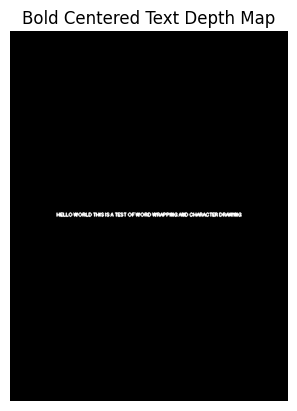

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def create_text_depth_map_bold(text="HELLO WORLD", width=600, height=800, font_size=64):
    # Use default font
    font = ImageFont.load_default()

    # Create image large enough to contain the text
    temp_image = Image.new('RGB', (1000, 1000))
    draw = ImageDraw.Draw(temp_image)

    # Split text into words and process for line wrapping
    words = text.split()
    lines = []
    line = []
    line_width = 0
    space_width = draw.textbbox((0, 0), ' ', font=font)[2]

    for word in words:
        word_width = draw.textbbox((0, 0), word, font=font)[2]
        if line_width + word_width + space_width <= width:
            line.append(word)
            line_width += word_width + space_width
        else:
            lines.append(' '.join(line))
            line = [word]
            line_width = word_width + space_width
    if line:
        lines.append(' '.join(line))

    # Calculate total text height for vertical centering
    text_height = 0
    line_heights = []
    for line in lines:
        line_bbox = draw.textbbox((0, 0), line, font=font)
        line_height = line_bbox[3] - line_bbox[1]
        text_height += line_height + 10  # Added 10 for padding between lines
        line_heights.append(line_height)

    start_y = (height - text_height) // 2 if height > text_height else 0

    # Create final image
    image = Image.new('1', (width, max(height, text_height)), 0)
    draw = ImageDraw.Draw(image)

    y = start_y
    for i, line in enumerate(lines):
        words = line.split()
        line_width = sum(draw.textbbox((0, 0), w, font=font)[2] + space_width for w in words[:-1]) + draw.textbbox((0, 0), words[-1], font=font)[2]
        x = (width - line_width) // 2
        for word in words:
            # Simulate bold text by overlapping the text with slight offsets
            offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]
            for dx, dy in offsets:
                draw.text((x + dx, y + dy), word, 1, font=font)
            draw.text((x, y), word, 1, font=font)
            x += draw.textbbox((0, 0), word, font=font)[2] + space_width
        y += line_heights[i] + 10  # Updated to include padding

    # Convert to numpy array and create depth map
    array = np.array(image)
    return array

# Example usage
text = "HELLO WORLD THIS IS A TEST OF WORD WRAPPING AND CHARACTER DRAWING"
depth_map_bold = create_text_depth_map_bold(text)
plt.imshow(depth_map_bold, cmap='gray')
plt.title("Bold Centered Text Depth Map")
plt.axis('off')
plt.show()
